## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

# 1. Analysis: Frame the Problem and Look at the Big Picture

### 1. Description


---

The task is to build a machine learning model that classifies specific fruits and vegetables from images. This problem is particularly engaging for us as it directly aligns with the themes of our bachelor project, which focuses on food, nutrition, and wellbeing. By incorporating image recognition into our app, we aim to enhance users' culinary experiences while promoting healthier, more informed food choices.

---

### 2. Business Objective Definition.


---

The objective is to develop an image classification model that can classify fruits and vegetables. This can be used in applications like grocery shopping apps, dietary trackers, or food recognition tools, or mainly into our bachelor project focusing on.

---

### 3. Framing the problem.

---
This is a **supervised learning** problem, where the model is going to be fed with a picture of a vegetables or a fruit, identify it and map it into its corresponding category. The model is going to be trained with a dataset that contains images and categorical labels. 

A classification model is going to be used to classify an image to a category, albeit at the present time it has not been decided which one yet. 

---


### 4. Measuring Performance

---
The performance is going to be measured using combination of several performance metrics. **Accuracy**, **F1-Score**, **Precision**, and **Recall**.

- **Accuracy**: Measures the overall percentage of correct predictions out of all predictions. We are going to use it to gain a general sense of how well the model performs across all classes.

- **Precision**: Measures the percentage of true positive predictions out of all positive predictions made by the model. It will help us recognize when the cost of false positives is high, such as incorrectly labeling a banana as an apple.
- **Recall**: Measures the percentage of true positive predictions out of all actual positives. It will helps us recognize when the cost of false negatives is high, like missing a fruit or vegetable that should be recognized.
- **F1 - Score**: Combines both **precision** and **recall** into a single metric, offering a balance between the two. It's particularly important when the dataset has imbalanced classes, it is going to help us evaluate both false positives and false negatives.



Each of these metrics provides a different perspective on model performance, allowing for a comprehensive evaluation, especially in cases where class imbalance or specific prediction errors are a concern.

---



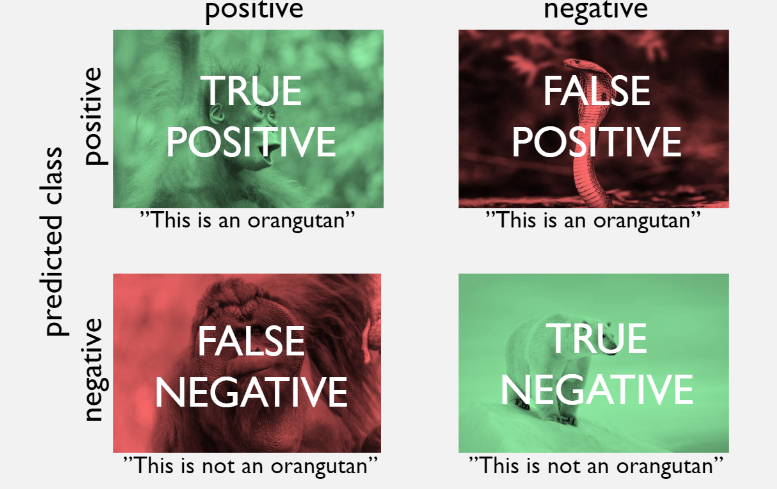


# 2. Get the data

### Finding the data.

---
The data can be found in Kaggle.
<a href="Food-Ingredient-Dataset-51
">51 Food and Vegetable Dataset</a>.

---


# 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

## Loading the data.

The following shows the folder structure for the dataset:

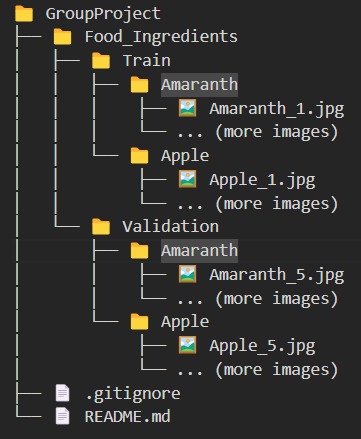


<!--
📁 GroupProject
├── 📁 Food_Ingredients
│   ├── 📁 Train
│   │   ├── 📁 Amaranth
│   │   │    ├── 🖼️ Amaranth_1.jpg
│   │   │    └── ... (more images)
│   │   └── 📁 Apple
│   │        ├── 🖼️ Apple_1.jpg
│   │        └── ... (more images)
│   └── 📁 Validation
│       ├── 📁 Amaranth
│       │    ├── 🖼️ Amaranth_5.jpg
│       │    └── ... (more images)
│       └── 📁 Apple
│            ├── 🖼️ Apple_5.jpg
│            └── ... (more images)
├── 📄 .gitignore
└── 📄 README.md


---

This code block bellow loads and preprocess image data. For each image, we performs two key preprocessing steps: converting the image to RGB format and resizing it to a fixed 128x128 pixel size. Displayed bellow are the total number of loaded images and lists each subdirectory along with its file count.


---

Number of pictures in the train directory: 3990
Number of pictures in the validation directory: 511


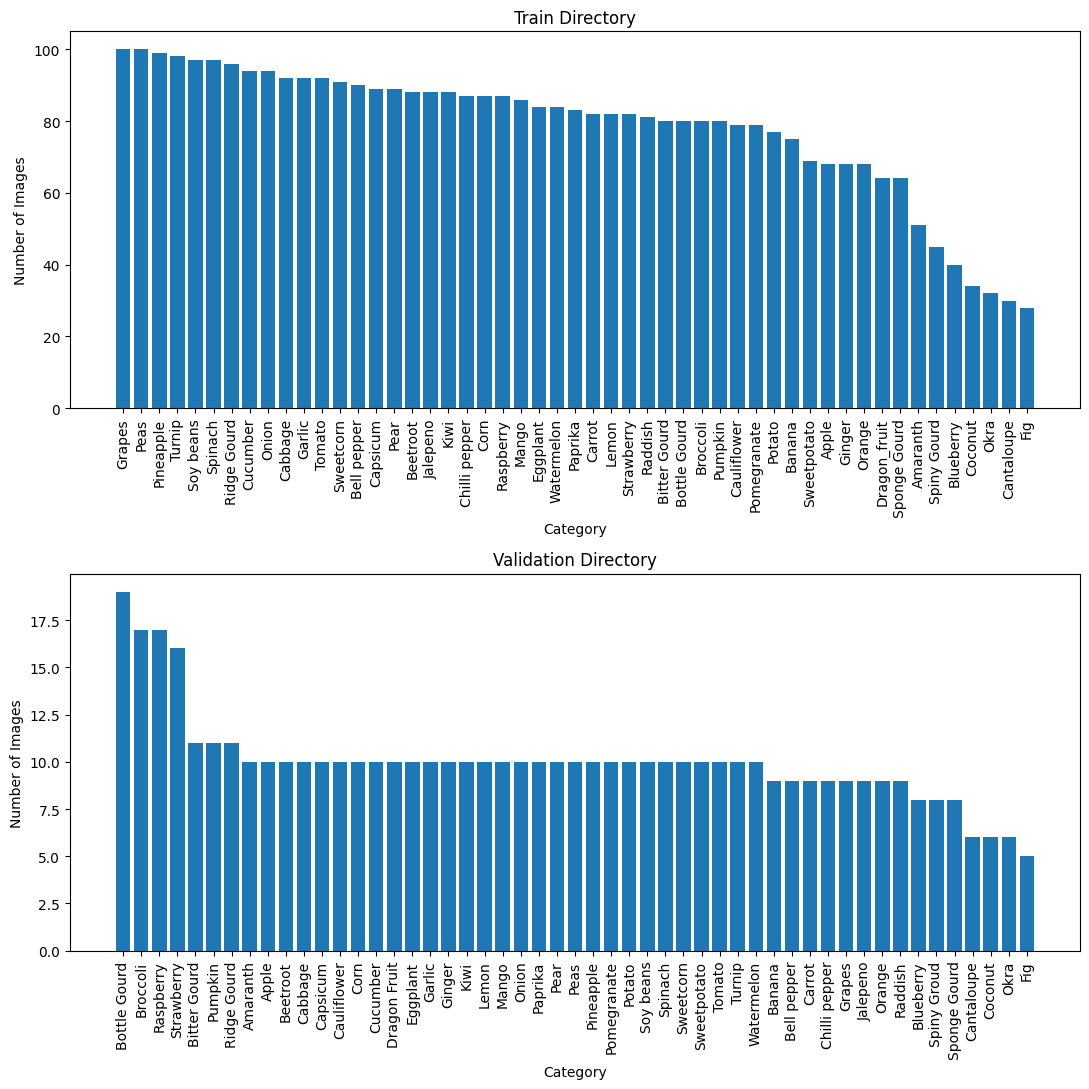

In [1]:
import os
from PIL import Image
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Path to the directory containing the images
data_dir = 'Food_Ingredients'

    # Count the number of images per category in the train and val directories
train_dir = os.path.join(data_dir, 'Train')
val_dir = os.path.join(data_dir, 'Validation')

def count_images_per_category(folder):
        category_counts = Counter()
        for subdir, dirs, files in os.walk(folder):
            category = os.path.basename(subdir)
            if category != os.path.basename(folder):  # Skip the root folder
                category_counts[category] += len([file for file in files if file.endswith(('jpg', 'jpeg', 'png'))])
        return category_counts

train_counts = count_images_per_category(train_dir)
val_counts = count_images_per_category(val_dir)


# Sort the counts by the number of images in descending order
sorted_train_counts = dict(sorted(train_counts.items(), key=lambda item: item[1], reverse=True))
sorted_val_counts = dict(sorted(val_counts.items(), key=lambda item: item[1], reverse=True))

# Plot the sorted counts
fig, axes = plt.subplots(2, 1, figsize=(11, 11))

axes[0].bar(sorted_train_counts.keys(), sorted_train_counts.values())
axes[0].set_title('Train Directory')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Images')
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(sorted_val_counts.keys(), sorted_val_counts.values())
axes[1].set_title('Validation Directory')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Number of Images')
axes[1].tick_params(axis='x', rotation=90)
# Print the number of pictures in the train and validation directories
print(f"Number of pictures in the train directory: {sum(train_counts.values())}")
print(f"Number of pictures in the validation directory: {sum(val_counts.values())}")
plt.tight_layout()
plt.show()

---

Our dataset of various fruits and vegetables is split in two: Training and Validation.

- **Training Set:**
Contains _**3990**_ images.
Represents _**88.64%**_ of the total data
- **Validation Set:**
Contains _**511**_ images.
Represents _**11.34%**_ of the total data
- **Total Data Size:**
_**4501**_ entries (combined total of Training and Validation sets)

The training data plot reveals a noticeable class imbalance, with some categories like **Grapes**, **Peas**, **Pineapple**, and **Capsicum** having a significantly higher number of images (around 100), while others like **Cantaloupe**, **Fig**, and **Okra** are underrepresented with fewer than 20 images.

Similiarily the validation plot reveals a class imbalance with categories like **Bottle Gourd**, **Brocolli**, **Raspberry**, **Strawberry**  having a higher number of images (around 18), while others like **Fig**, **Okra**, **Coconut**, **Cantaloupe** are underrepresented with around 7 images.


This imbalance could affect the model's ability to classify underrepresented classes correctly, as it may become biased toward the more frequent categories. To address this issue, we plan to employ oversampling by adding augmented versions of underrepresented classes and dropping images at random for overrepresented classes, we do this so that each class could have a more or less an equal number of images. Additionally we will monitor how well the model performs on each class with aforemention metrics precesion, recall and F1-score.

---

### 3.5 Visualize Data ###

We do a random sample inspection by taking 9 random images and their names.

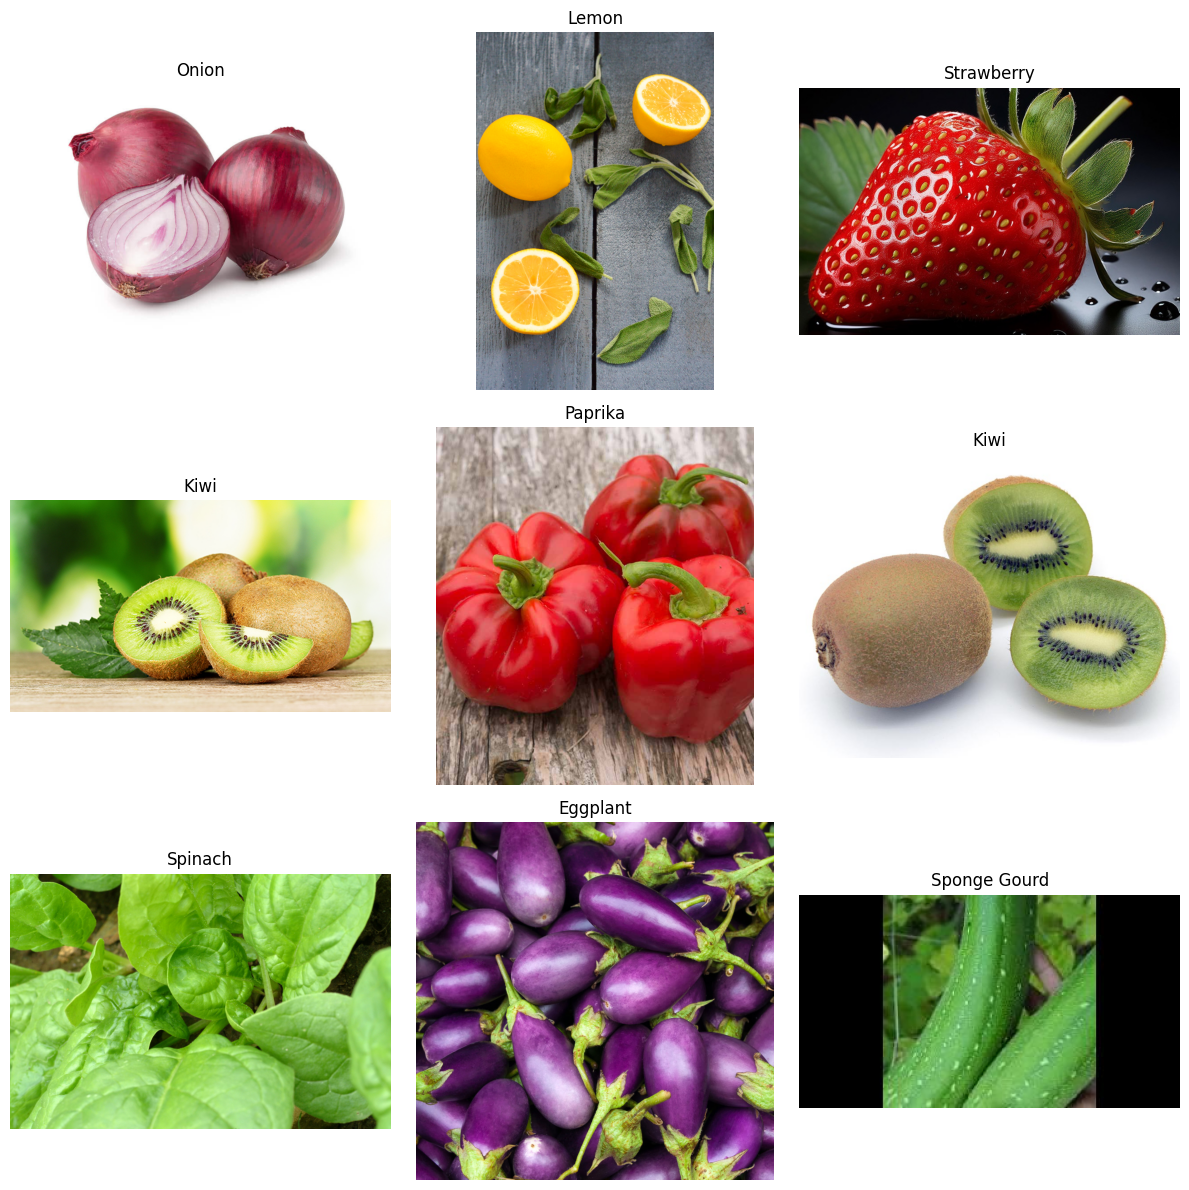

In [2]:
import random

# Function to load and preprocess images
def load_image(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')
    # img = img.resize((128, 128))
    return np.array(img)

# Get a list of all image paths in the validation directory
image_paths = []
for subdir, dirs, files in os.walk(val_dir):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):
            image_paths.append(os.path.join(subdir, file))

# Randomly select 3 images or less if there are not enough images
sample_size = min(9, len(image_paths))
sampled_image_paths = random.sample(image_paths, sample_size)

# Load and display the images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for ax, img_path in zip(axes.flatten(), sampled_image_paths):
    img = load_image(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(os.path.basename(os.path.dirname(img_path)))

plt.tight_layout()
plt.show()


To study the correlations between features, we will use the following steps:

1. **Convert Image Data to Features**: Extract meaningful features from the images, such as color histograms, texture features, or deep learning features using a pre-trained model.
2. **Compute Correlation Matrix**: Calculate the correlation matrix to understand the relationships between different features.
3. **Visualize Correlations**: Use a heatmap to visualize the correlation matrix.

Below is an example of how to extract features using a pre-trained model and compute the correlation matrix.


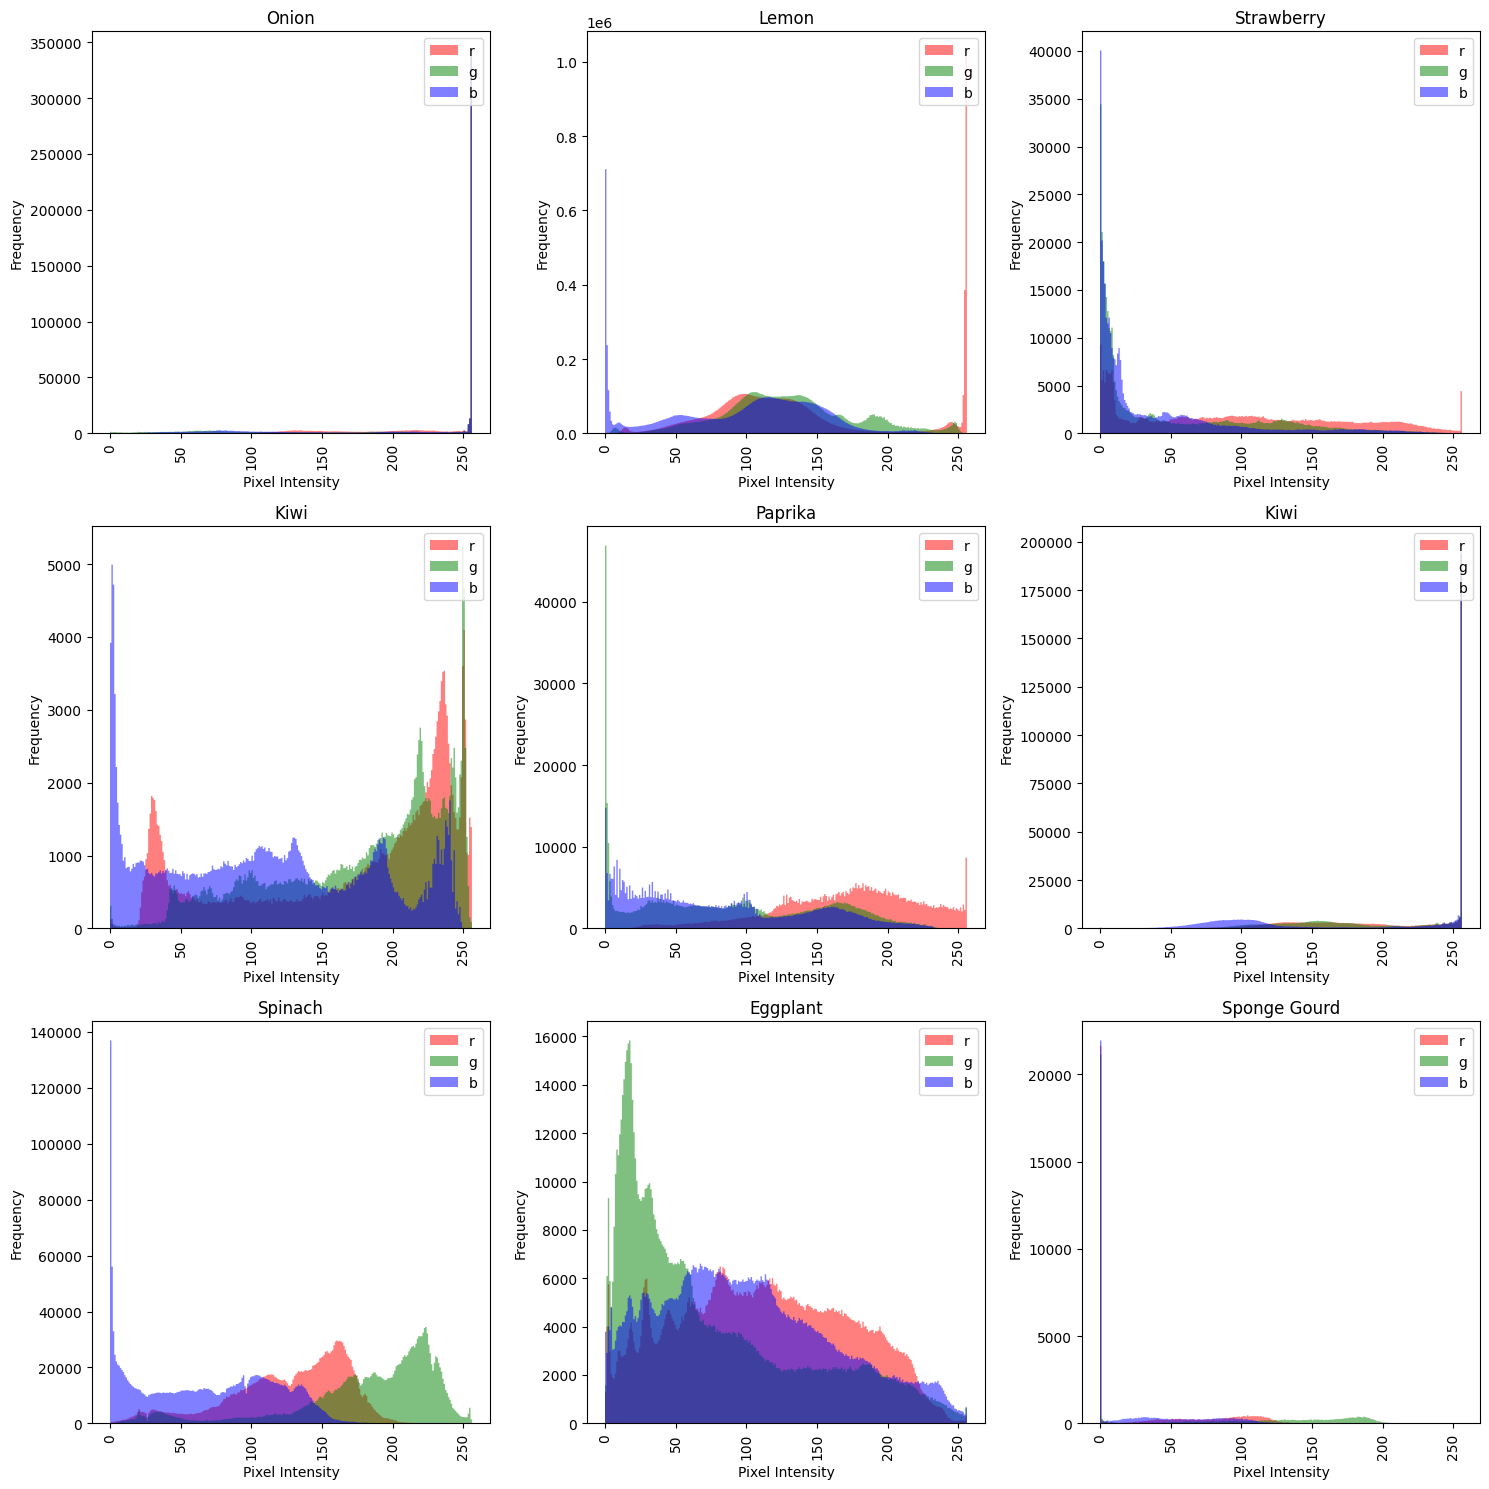

In [3]:
# Convert train_counts and val_counts to dictionaries
train_counts_dict = dict(train_counts)
val_counts_dict = dict(val_counts)

# Function to plot histograms with different visualizations
def plot_histograms(image_paths):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    visualization = 'stepfilled'
    
    for ax, img_path in zip(axes.flatten(), sampled_image_paths):
        img = load_image(img_path)
        colors = ('r', 'g', 'b')
        for i, color in enumerate(colors):
            hist, bins = np.histogram(img[:, :, i], bins=256, range=(0, 256))
            ax.hist(bins[:-1], bins, weights=hist, color=color, alpha=0.5, histtype=visualization, label=color)
        
        ax.set_title(os.path.basename(os.path.dirname(img_path)))
        ax.set_xlabel('Pixel Intensity')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=90)
        ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Plot histograms for the sampled images
plot_histograms(sampled_image_paths)

After observing a substantial amount of histograms the analysis reveals several key patterns that can help in understanding their characteristics for classification purposes. 

**Fruits** show a wide range of color diversity, with certain categories exhibiting bright hues like Strawberry, Apple, Mango, and Orange, which are dominated by red, orange, or yellow tones. Others, such as Kiwi, Pear, and Green Grapes, have strong green components, while fruits like Blueberry, Fig, and Purple Grapes are characterized by darker tones in the blue or red spectrum. Many fruits have smooth color gradients, creating less abrupt spikes in their histograms. However, fruits like Cantaloupe, Watermelon, and Dragon Fruit often display a mix of multiple hues, adding complexity to their pixel intensity distributions. 

**Vegetables**, on the other hand, often exhibit strong green tones, especially in items like Spinach, Broccoli, Peas, and Ridge Gourd. Root vegetables such as Potato, Garlic, Onion, and Ginger tend to have muted or pale color tones, which results in flatter histograms. In contrast, vegetables like Carrot, Bell Pepper, and Chilli Pepper show vibrant red, orange, or yellow peaks, making them visually distinct. White or light-colored vegetables such as Cauliflower and Cabbage can introduce spikes in the white intensity, often due to their color or the background, and this may need to be addressed in classification models to avoid misinterpretation.

For effective classification, we have to consider the color dominance of each item. Fruits and vegetables with strong color contrasts, like Strawberries or Carrots, are going to be easier to classify based on color histograms. On the other hand, muted or pale vegetables such as Ginger or Garlic may require additional features, such as texture, for accurate classification. Multicolored items, such as Watermelon or Dragon Fruit, benefit from localized feature analysis to separate the background from the object. Additionally, items with white or light backgrounds, like Cauliflower or Cabbage, can be challenging to  clssify the background’s influence on pixel intensity, and we may employ augmentation techniques to mitigate background bias. 

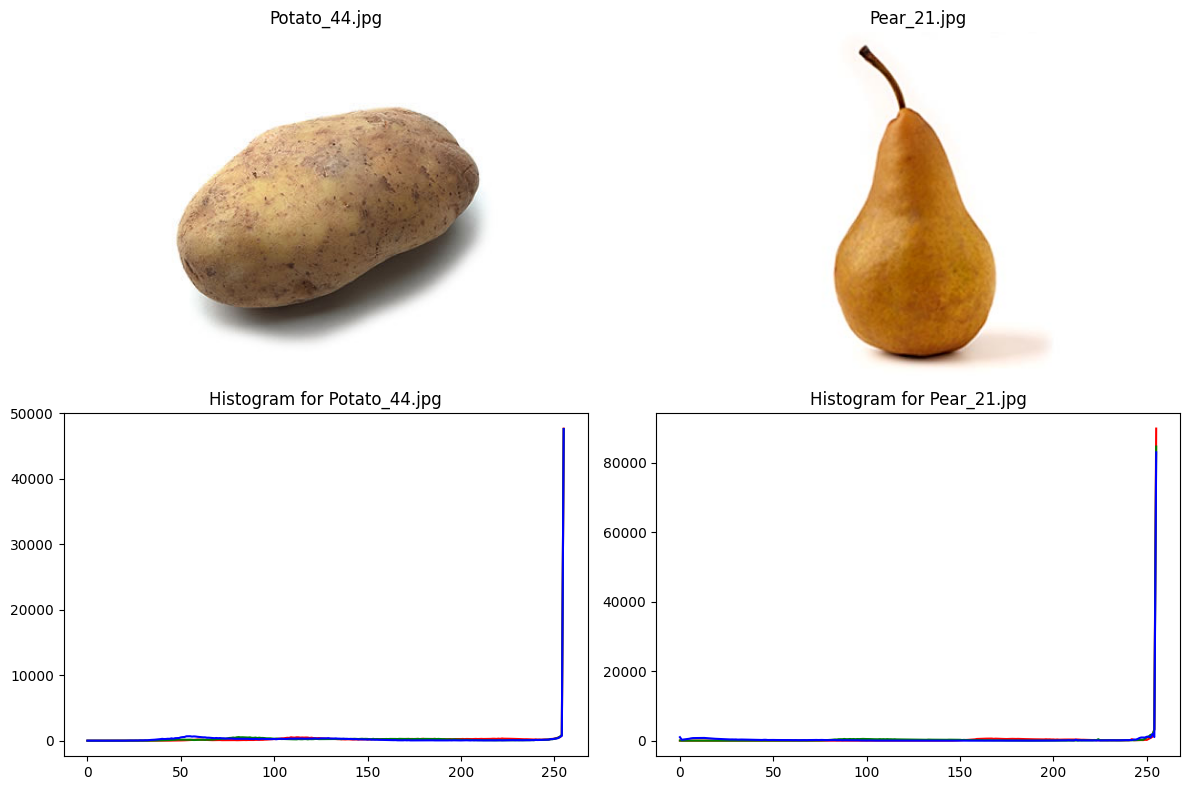

In [4]:
# Load and display the Potato_44.jpg image
potato_44_path = os.path.join(data_dir, 'Train', 'Potato', 'Potato_44.jpg')
potato_44_image = load_image(potato_44_path)

# Load and display the Pear_21.jpg image
pear_21_path = os.path.join(data_dir, 'Train', 'Pear', 'Pear_21.jpg')
pear_21_image = load_image(pear_21_path)

# Display the two images side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Show Potato_44.jpg
axes[0, 0].imshow(potato_44_image)
axes[0, 0].set_title('Potato_44.jpg')
axes[0, 0].axis('off')

# Show Pear_21.jpg
axes[0, 1].imshow(pear_21_image)
axes[0, 1].set_title('Pear_21.jpg')
axes[0, 1].axis('off')

# Plot histogram for Potato_44.jpg
for i, color in enumerate(['r', 'g', 'b']):
    hist, bins = np.histogram(potato_44_image[:, :, i], bins=256, range=(0, 256))
    axes[1, 0].plot(bins[:-1], hist, color=color)
axes[1, 0].set_title('Histogram for Potato_44.jpg')

# Plot histogram for Pear_21.jpg
for i, color in enumerate(['r', 'g', 'b']):
    hist, bins = np.histogram(pear_21_image[:, :, i], bins=256, range=(0, 256))
    axes[1, 1].plot(bins[:-1], hist, color=color)
axes[1, 1].set_title('Histogram for Pear_21.jpg')

plt.tight_layout()
plt.show()


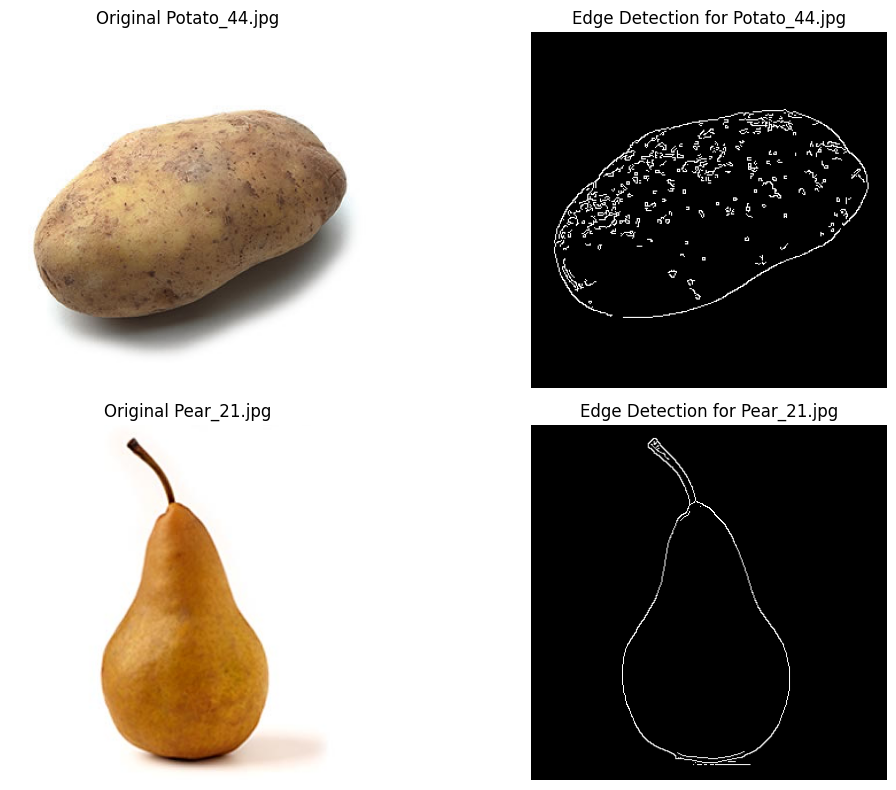

In [5]:
import cv2

# Convert images to grayscale
potato_gray = cv2.cvtColor(potato_44_image, cv2.COLOR_RGB2GRAY)
pear_gray = cv2.cvtColor(pear_21_image, cv2.COLOR_RGB2GRAY)

# Perform Canny edge detection
potato_edges = cv2.Canny(potato_gray, threshold1=100, threshold2=200)
pear_edges = cv2.Canny(pear_gray, threshold1=100, threshold2=200)

# Display the original and edge-detected images
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Show original Potato_44.jpg
axes[0, 0].imshow(potato_44_image)
axes[0, 0].set_title('Original Potato_44.jpg')
axes[0, 0].axis('off')

# Show edge-detected Potato_44.jpg
axes[0, 1].imshow(potato_edges, cmap='gray')
axes[0, 1].set_title('Edge Detection for Potato_44.jpg')
axes[0, 1].axis('off')

# Show original Pear_21.jpg
axes[1, 0].imshow(pear_21_image)
axes[1, 0].set_title('Original Pear_21.jpg')
axes[1, 0].axis('off')

# Show edge-detected Pear_21.jpg
axes[1, 1].imshow(pear_edges, cmap='gray')
axes[1, 1].set_title('Edge Detection for Pear_21.jpg')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

What edge detections tells us: 

**Shape Disparity:** While the colors might be close, the shapes of a potato and a pear are distinct. Edge detection will highlight these shape differences:
- Potato: Generally has a more irregular, elongated, and somewhat bumpy outline.
- Pear: Tends to have a smoother, more tapered shape with a distinct stem end.

**Texture Contrast:** Even with similar colors, the textures of the fruits differ:
- Potato: Often exhibits a rougher, more textured skin.
- Pear: Typically has a smoother skin surface. Edge detection can capture these texture variations as subtle variations in edge density or continuity.

**Stem Presence:** While not always prominent, the stem of a pear can be a distinguishing feature. Edge detection can isolate the stem as a separate edge element.

# 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### Sanity Check

Making sure all of the images in the dataset are valid before proceeding.

In [ ]:
def verify_images(directory):
    invalid_images = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                try:
                    img_path = os.path.join(subdir, file)
                    img = Image.open(img_path)
                    img.verify()  # Verify that it is, indeed an image
                except (IOError, SyntaxError) as e:
                    invalid_images.append(img_path)
                    print(f"Invalid image: {img_path} - {e}")
    return invalid_images

# Verify images in both train and validation directories
invalid_train_images = verify_images(train_dir)
invalid_val_images = verify_images(val_dir)

print(f"Number of invalid images in the train directory: {len(invalid_train_images)}")
print(f"Number of invalid images in the validation directory: {len(invalid_val_images)}")

### Find outliers.

/tmp/ipykernel_6297/3386245275.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(file_sizes, labels=['File Sizes'])


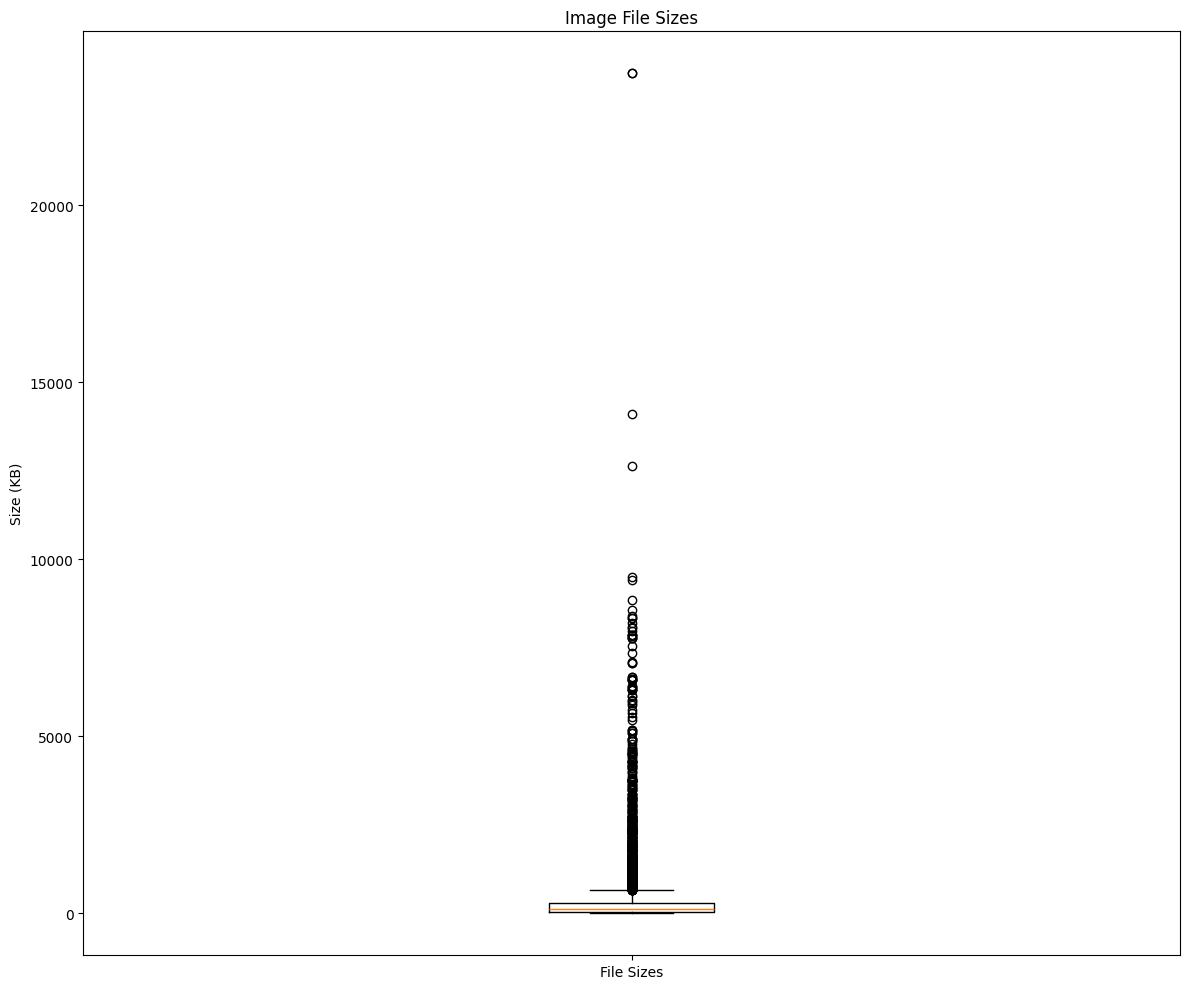

In [8]:
import os

# Function to get the file size in kilobytes
def get_file_size(image_path):
    return os.path.getsize(image_path) / 1024  # Convert bytes to kilobytes

# Get a list of all image paths in the train and validation directories
all_image_paths = []
for subdir, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):
            all_image_paths.append(os.path.join(subdir, file))

for subdir, dirs, files in os.walk(val_dir):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):
            all_image_paths.append(os.path.join(subdir, file))

# Calculate the file sizes
file_sizes = [get_file_size(image_path) for image_path in all_image_paths]

# Plot the box plot for file sizes
fig, ax = plt.subplots(figsize=(12, 10))
ax.boxplot(file_sizes, labels=['File Sizes'])
ax.set_title('Image File Sizes')
ax.set_ylabel('Size (KB)')

plt.tight_layout()
plt.show()


--- 

The boxplot shows us the distribution of image file sizes in our dataset and highlights a significant skewness. Most of the image file sizes are concentrated within a small range. This suggests that the majority of the images are relatively small in size. However, we notice a numerous amount of outliers extending far beyond the upper limit of the IQR, with some images exceeding **10,000 KB (10 MB)** and even one extreme case surpassing **22,000 KB (22 MB)**. This right-skewed distribution indicates inconsistency in the dataset, where a few very large images stand out. 

To address this, we are going to preprocess the data by resizing or compressing the larger images to match the typical file size range, ensuring consistency and improving the efficiency of your image recognition model.

---

### Creating copy of the dataset.

In [9]:
import shutil

# Define the paths for the original and copied datasets
original_train_dir = 'Food_Ingredients/Train'
original_val_dir = 'Food_Ingredients/Validation'
copy_train_dir = 'Food_Ingredients_Copy/Train'
copy_val_dir = 'Food_Ingredients_Copy/Validation'

# Function to copy the dataset
def copy_dataset(original_dir, copy_dir):
    if not os.path.exists(copy_dir):
        os.makedirs(copy_dir)
    for subdir, dirs, files in os.walk(original_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                original_file_path = os.path.join(subdir, file)
                relative_path = os.path.relpath(original_file_path, original_dir)
                copy_file_path = os.path.join(copy_dir, relative_path)
                copy_file_dir = os.path.dirname(copy_file_path)
                if not os.path.exists(copy_file_dir):
                    os.makedirs(copy_file_dir)
                shutil.copy2(original_file_path, copy_file_path)

# Copy the train and validation datasets
copy_dataset(original_train_dir, copy_train_dir)
copy_dataset(original_val_dir, copy_val_dir)

print("Datasets copied successfully.")

Datasets copied successfully.


### Normalizing Image Pixel Values

In [ ]:
def normalize_image(image):
    return image / 255.0

def batch_normalize_images(image_paths, batch_size=100):
    normalized_batches = []
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i + batch_size]
        batch_images = [normalize_image(load_image(img_path)) for img_path in batch_paths]
        normalized_batches.extend(batch_images)
    return normalized_batches

# Normalize all images in batches
batch_size = 2
normalized_images = batch_normalize_images(all_image_paths, batch_size)

# Display the first normalized image as an example
plt.imshow(normalized_images[0])
plt.title('Normalized Image')
plt.axis('off')
plt.show()

/usr/lib64/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

# 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

# 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.